Preliminary analysis of EDDMaps dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CS4824CapstoneData/EDDMapS_dirty.csv", encoding='latin-1')

/tmp/ipykernel_21567/3170345960.py:1: DtypeWarning: Columns (15,23,25,26,27,30,31,32,33,35,38,39,40,42,48,60,61,62,69,71,74,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CS4824CapstoneData/EDDMapS_dirty.csv", encoding='latin-1')


In [3]:
# Drop columns that are missing
df = df.dropna(axis=1, how="all")

# Convert date columns to pandas datetime 
df["ObsDate"] = pd.to_datetime(df["ObsDate"], errors="coerce")
df["DateEnt"] = pd.to_datetime(df["DateEnt"], errors="coerce")
df["DateUp"] = pd.to_datetime(df["DateUp"], errors="coerce")

In [4]:
missing = df.isnull().sum().sort_values(ascending=False)
missing.head(10)

Site          26131
Host          26131
LifeStatus    26130
LocalOwner    26129
DateAcc       26126
Incidence     26118
Severity      26115
NumCollect    26103
GrossAcre     26102
Museum        26090
dtype: int64

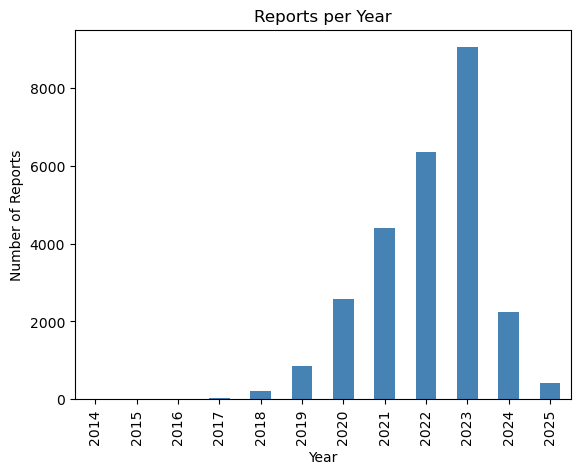

In [5]:
# Reports per year plot

df["year"] = df["ObsDate"].dt.year

df["year"].value_counts().sort_index().plot(
    kind="bar", title="Reports per Year", color="steelblue"
)
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.show()


In [6]:
# Encode infestation status

status_map = {
    'Positive': 1,
    'Negative': 0,
}
df['Status_encoded'] = df['Status'].map(status_map)
df['Status_encoded'].value_counts()


Status_encoded
1.0    26078
0.0       19
Name: count, dtype: int64

In [7]:
# Clean and split location 
df['Location_clean'] = df['Location'].str.replace('"', '')

df[['County', 'State', 'Country']] = (
    df['Location_clean']
    .str.split(',', expand=True)
)

# Strip whitespace
df['County'] = df['County'].str.strip()
df['State'] = df['State'].str.strip()
df['Country'] = df['Country'].str.strip()

df = df.drop(columns=['Location_clean'])

In [8]:
df[["Latitude", "Longitude"]].dropna().describe()


Latitude     Longitude
count  25607.000000  25607.000000
mean      40.332864    -75.739745
std        0.702964      2.240914
min       30.711960   -122.665970
25%       39.981875    -76.554135
50%       40.484100    -75.126710
75%       40.778960    -74.012580
max       47.705630    -71.183300

In [9]:
# Define relevent columns
useful_cols = [
    "objectid", "ObsDate", "year",
    "Latitude", "Longitude",
    "County", "State", "Status_encoded"
]

df_useful = df[useful_cols].copy()

# Save cleaned data
df_useful.to_csv("CS4824CapstoneData/EDDMapS/EDDMapS_clean.csv", index=False)
